In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('C:\\Users\\ABIARYAA\\Documents\\Downloads\\Deep learning A to Z\\DL Colab Changes\\Self_Organizing_Maps')

In [8]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [9]:
X= dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [10]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [11]:
#Trauining SOM
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [12]:
#Visualizing
from pylab import bone,pcolor,colorbar,plot,show

In [13]:
bone()  #Shows just white som window

<Figure size 432x288 with 0 Axes>

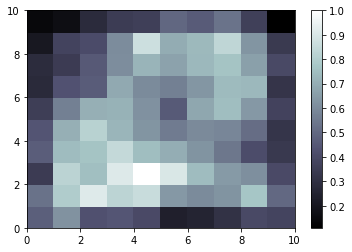

In [26]:
pcolor(som.distance_map().T) #gives MID for all winning neurons
colorbar()

colorbar #Legend

In [27]:
markers = ['o', 's']
colors = ['r', 'g']

In [29]:
X.shape

(690, 15)

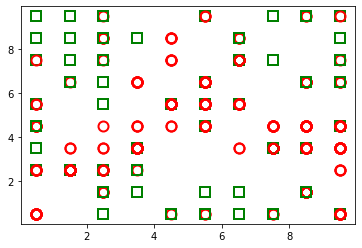

In [31]:
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2
         )
show()

In [32]:
#Finding the frauds
mappings = som.win_map(X)  #mappings is a dictonary

In [49]:
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)
pd.DataFrame(frauds)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15704581.0,1.0,23.75,0.415,1.0,8.0,4.0,0.040,0.0,1.0,2.0,0.0,2.0,128.0,7.0
1,15761854.0,1.0,31.25,2.835,2.0,1.0,1.0,0.000,0.0,1.0,5.0,0.0,2.0,176.0,147.0
2,15725776.0,1.0,23.08,0.000,2.0,4.0,4.0,1.000,0.0,1.0,11.0,0.0,1.0,0.0,1.0
3,15815040.0,1.0,19.00,0.000,1.0,1.0,1.0,0.000,0.0,1.0,4.0,0.0,2.0,45.0,2.0
4,15697460.0,1.0,22.00,0.790,2.0,9.0,4.0,0.290,0.0,1.0,1.0,0.0,2.0,420.0,284.0
5,15788442.0,1.0,19.58,0.585,2.0,1.0,1.0,0.000,0.0,1.0,3.0,0.0,2.0,350.0,770.0
6,15737998.0,1.0,18.83,0.415,1.0,8.0,4.0,0.165,0.0,1.0,1.0,0.0,2.0,200.0,2.0
7,15586183.0,1.0,17.08,0.250,2.0,11.0,4.0,0.335,0.0,1.0,4.0,0.0,2.0,160.0,9.0
8,15718921.0,1.0,16.33,2.750,2.0,6.0,4.0,0.665,0.0,1.0,1.0,0.0,2.0,80.0,22.0
9,15607988.0,1.0,38.42,0.705,2.0,8.0,4.0,0.375,0.0,1.0,2.0,0.0,2.0,225.0,501.0


# CASE STUDY

In [50]:
#Make a Hybrid DL Model


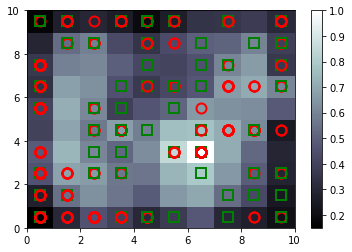

In [3]:
#Identify the Frauds with SOM

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('C:\\Users\\ABIARYAA\\Documents\\Downloads\\Deep learning A to Z\\DL Colab Changes\\Self_Organizing_Maps')

dataset = pd.read_csv('Credit_Card_Applications.csv')
X= dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

#Trauining SOM
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

#Visualizing
from pylab import bone,pcolor,colorbar,plot,show
bone()  #Shows just white som window
pcolor(som.distance_map().T) #gives MID for all winning neurons
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2
         )
show()
#Finding the frauds
mappings = som.win_map(X)  #mappings is a dictonary
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)
fraud_df = pd.DataFrame(frauds)


In [4]:
fraud_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15697310.0,1.0,41.17,4.040,2.0,13.0,8.0,7.00,1.0,1.0,8.0,0.0,2.0,320.0,1.0
1,15697844.0,1.0,57.42,8.500,2.0,10.0,8.0,7.00,1.0,1.0,3.0,0.0,2.0,0.0,1.0
2,15706602.0,1.0,29.67,1.415,2.0,9.0,8.0,0.75,1.0,1.0,1.0,0.0,2.0,240.0,101.0
3,15728082.0,1.0,31.92,4.460,2.0,13.0,8.0,6.04,1.0,1.0,3.0,0.0,2.0,311.0,301.0
4,15675176.0,1.0,43.25,3.000,2.0,11.0,8.0,6.00,1.0,1.0,11.0,0.0,2.0,80.0,1.0
5,15768449.0,1.0,41.92,0.420,2.0,8.0,8.0,0.21,1.0,1.0,6.0,0.0,2.0,220.0,949.0
6,15740356.0,1.0,43.00,0.290,1.0,13.0,8.0,1.75,1.0,1.0,8.0,0.0,2.0,100.0,376.0
7,15723827.0,1.0,76.75,22.290,2.0,10.0,9.0,12.75,1.0,1.0,1.0,1.0,2.0,0.0,110.0
8,15814116.0,1.0,42.08,1.040,2.0,9.0,4.0,5.00,1.0,1.0,6.0,1.0,2.0,500.0,10001.0
9,15785705.0,1.0,59.50,2.750,2.0,9.0,4.0,1.75,1.0,1.0,5.0,1.0,2.0,60.0,59.0


In [5]:
#Now Supervised DL
customers = dataset.iloc[:, 1:]  #All except

In [6]:
#Creating the dependent variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [7]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [8]:
#ANN
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [9]:
classifier = Sequential()

In [10]:
#Input Layer
classifier.add(Dense(units =2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15)) #15 columns

In [11]:
#Output Layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [12]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)


Epoch 1/2
690/690 [==============================] - 8s 12ms/step - loss: 0.4489 - accuracy: 0.9841
Epoch 2/2
690/690 [==============================] - 2s 3ms/step - loss: 0.1702 - accuracy: 0.9855: 2s


#### In the neural network terminology:

#### one epoch = one forward pass and one backward pass of all the training examples
#### batch size = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you'll need.
#### number of iterations = number of passes, each pass using [batch size] number of examples. To be clear, one pass = one forward pass + one backward pass (we do not count the forward pass and backward pass as two different passes).
#### Example: if you have 1000 training examples, and your batch size is 500, then it will take 2 iterations to complete 1 epoch.

In [14]:
y_pred = classifier.predict(customers)

In [17]:
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)

In [19]:
y_pred = y_pred[y_pred[:, 1].argsort()]

In [23]:
y_pred.shape

(690, 2)

In [21]:
y_pred[:, 1].shape

(690,)

In [28]:
pd.DataFrame(y_pred, columns =['customer_id', 'probability of is_fraud'])

,customer_id,probability of is_fraud
0,15608916.0,0.002302
1,15611409.0,0.002619
2,15752344.0,0.002817
3,15623210.0,0.003261
4,15665014.0,0.003307
...,...,...
685,15785367.0,0.309419
686,15689781.0,0.309419
687,15595010.0,0.309419
688,15723827.0,0.309419


In [29]:
[1,2,3] - 1

TypeError: unsupported operand type(s) for -: 'list' and 'int'